In [2]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import os
from model import detr_simplified, DETR, DETRModel
from cornell_dataset import CornellDataset
from view_bbox import draw_bbox

In [3]:
model = DETRModel(20, 16)
loaded_model = torch.load("overfit-checkpoints/model_34.ckpt")

model.load_state_dict(loaded_model["model"])
model.eval()

Using cache found in /home/sbhara/.cache/torch/hub/facebookresearch_detr_main


DETRModel(
  (model): DETR(
    (transformer): Transformer(
      (encoder): TransformerEncoder(
        (layers): ModuleList(
          (0): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
            )
            (linear1): Linear(in_features=256, out_features=2048, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
            (linear2): Linear(in_features=2048, out_features=256, bias=True)
            (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (dropout1): Dropout(p=0.1, inplace=False)
            (dropout2): Dropout(p=0.1, inplace=False)
          )
          (1): TransformerEncoderLayer(
            (self_attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
    

In [4]:
from torch.utils.data import DataLoader 
dataset_path = "dataset/cornell"
img_set = "train"
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
inv_normalize = transforms.Normalize(
                            mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
                            std=[1/0.229, 1/0.224, 1/0.225])
train_dataset = CornellDataset(dataset_path, "train", normalize)
val_dataset = CornellDataset(dataset_path, "val", normalize)

val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox).to("cpu")
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [5]:
def iou(box1,box2):
  '''
    Computes the intersection over union of two bounding boxes box = [x1,y1,x2,y2]
    where (x1, y1) and (x2, y2) are the top left and bottom right coordinates respectively
  '''
  x1, y1 = max(box1[0], box2[0]), max(box1[1], box2[1])
  x2, y2 = min(box1[2], box2[2]), min(box1[3], box2[3])
  inter_area = max(0, (x2 - x1 + 1)) * max(0, (y2 - y1 + 1))
  union_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1) + (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1) - inter_area
  return inter_area/union_area

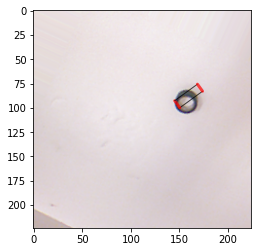

IOU: 0.0, GT: tensor([7], dtype=torch.int32), tensor([[142.,  94., 155., 101.]], dtype=torch.float64) Class: 7, bboxes: tensor([[144.9966,  83.2013, 173.9547,  92.1851]])


<Figure size 432x288 with 0 Axes>

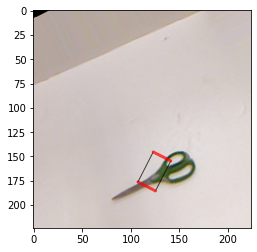

IOU: 0.20932165562996183, GT: tensor([4], dtype=torch.int32), tensor([[124., 151., 177., 173.]], dtype=torch.float64) Class: 4, bboxes: tensor([[106.8261, 155.2825, 141.5253, 175.6073]])


<Figure size 432x288 with 0 Axes>

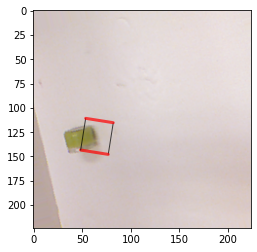

IOU: 0.2789677427755236, GT: tensor([2], dtype=torch.int32), tensor([[ 24.0000, 122.0000,  67.0000, 144.0000]], dtype=torch.float64) Class: 2, bboxes: tensor([[ 48.5276, 114.9197,  81.5839, 143.6943]])


<Figure size 432x288 with 0 Axes>

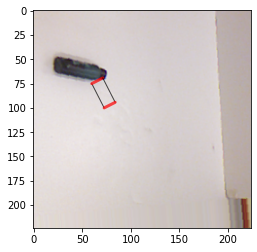

IOU: 0.005962994339456646, GT: tensor([18], dtype=torch.int32), tensor([[17., 41., 77., 78.]], dtype=torch.float64) Class: 18, bboxes: tensor([[57.6951, 78.2064, 85.8228, 90.9572]])


<Figure size 432x288 with 0 Axes>

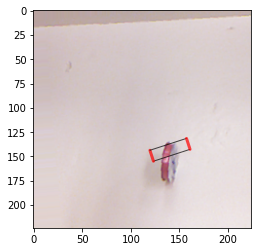

IOU: 0.0, GT: tensor([9], dtype=torch.int32), tensor([[121., 153., 154., 169.]], dtype=torch.float64) Class: 9, bboxes: tensor([[120.4677, 137.2233, 160.0815, 149.0668]])


<Figure size 432x288 with 0 Axes>

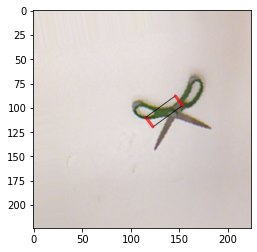

IOU: 0.07860466606423494, GT: tensor([7], dtype=torch.int32), tensor([[ 86.,  76., 125., 110.]], dtype=torch.float64) Class: 7, bboxes: tensor([[115.5259,  97.4267, 153.0202, 109.7309]])


<Figure size 432x288 with 0 Axes>

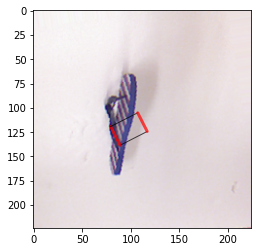

IOU: 0.0, GT: tensor([8], dtype=torch.int32), tensor([[ 76.,  85., 113., 109.]], dtype=torch.float64) Class: 8, bboxes: tensor([[ 82.3195, 110.9464, 113.6052, 132.5469]])


<Figure size 432x288 with 0 Axes>

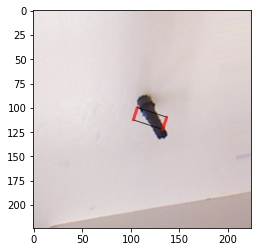

IOU: 0.09603583434757965, GT: tensor([13], dtype=torch.int32), tensor([[116.0000, 115.0000, 140.0000, 129.0000]], dtype=torch.float64) Class: 13, bboxes: tensor([[103.8137, 104.2829, 135.6512, 117.5835]])


<Figure size 432x288 with 0 Axes>

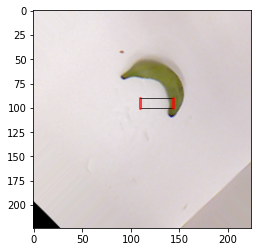

IOU: 0.1735300545506654, GT: tensor([11], dtype=torch.int32), tensor([[121.,  71., 159.,  98.]], dtype=torch.float64) Class: 11, bboxes: tensor([[109.8424,  89.7058, 143.4814,  99.7884]])


<Figure size 432x288 with 0 Axes>

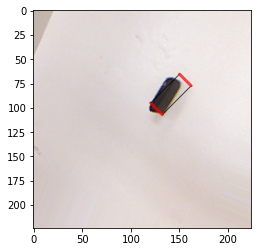

IOU: 0.22077293365970566, GT: tensor([6], dtype=torch.int32), tensor([[127.,  71., 145.,  87.]], dtype=torch.float64) Class: 6, bboxes: tensor([[120.2498,  77.5783, 162.2413,  94.5333]])


<Figure size 432x288 with 0 Axes>

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
for i, (x_val, y_val) in enumerate(train_loader):
    x_val = x_val.to(device)
    box = y_val
    output = model(x_val)
    bbox = output["pred_boxes"]
    labels = output["pred_logits"]

    probas = labels.softmax(-1)
    #print( bbox * 224)
    probas = torch.argmax(probas, dim=2, keepdim=True)
    idx = torch.argmax(probas)
    pred_class = probas[:, idx].squeeze().cpu().numpy()

    bbox_pred = bbox[:, idx].detach().cpu() * 224

    x_val = inv_normalize(x_val)
    draw_func = draw_bbox(bbox_pred.squeeze(0).detach().cpu().numpy(), pred_class)
    draw_func.draw_rotated_box(x_val[0].permute(1, 2, 0).cpu().numpy())
    iou_calc = iou(y_val[1].squeeze(0).detach().cpu().numpy()*224, bbox_pred.squeeze(0).detach().cpu().numpy())

    print(f"IOU: {iou_calc}, GT: {y_val[0]}, {y_val[1]*224} Class: {pred_class}, bboxes: {bbox_pred}")
    i+=1
    if i == 10:
        break
    